In [26]:
import matplotlib.pyplot as plt
import cv2
import asyncio
import math
import numpy as np
import base64

In [27]:
from raya.standalone_handler import StandaloneHandler
from raya.exceptions import *
from raya.enumerations import ANIMATION_TYPE

In [3]:
raya = StandaloneHandler()
await raya.start()

In [4]:
cameras = await raya.enable_controller('cameras')
ui = await raya.enable_controller('ui')

In [8]:
camera_names = cameras.available_color_cameras()
if 'nav_top' in camera_names:
    # Real Robot
    CAMERA_NAME = 'nav_bottom'
else:
    # Simulation
    CAMERA_NAME = 'chest'
await cameras.enable_color_camera(CAMERA_NAME)

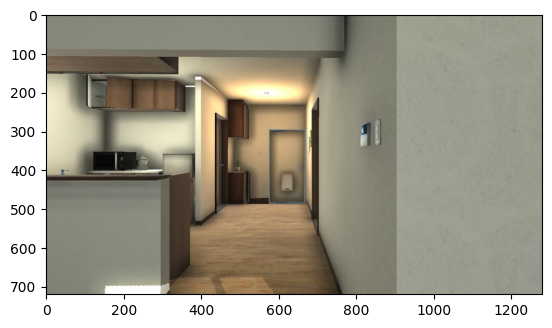

In [9]:
img = await cameras.get_next_frame(CAMERA_NAME)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [22]:
img_enc = cv2.imencode(".jpg", img)[1].tobytes()
img_base64 = base64.b64encode(img_enc).decode('utf-8')

In [29]:
await ui.display_animation(
        title = 'Image',
        subtitle='from camera', 
        content = img_base64, 
        format=ANIMATION_TYPE.JPEG
    )